In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

In [2]:
theta, gamma_avg_lin, gamma_avg_nfw, lin_plus_nf, gamma_avg_nla = np.loadtxt('./txtfiles/photo_z_test/model_IA_out_fromJAB.txt', unpack=True)

In [3]:
theta_lens, gamma_t_B = np.loadtxt('./txtfiles/photo_z_test/gammat_lens_B_truez_DESY1_no_fidIA_DESHoD_assumedpar_OmM=0.3158_HH0=67.32.dat', unpack=True)

In [4]:
F_b = np.loadtxt('./txtfiles/photo_z_test/F_b_DESY1_wfidIA_measured-redshifts-wrong_variableF_DESHoD_sigz=0.0001_delz=0.0.txt')

In [5]:
B_b = np.loadtxt('./txtfiles/boosts/Boost_B_survey=DESY1_DESHoD.txt')

In [6]:
interp_IA = scipy.interpolate.interp1d(theta, lin_plus_nf)

In [7]:
lin_plus_nfw_short = interp_IA(theta_lens)

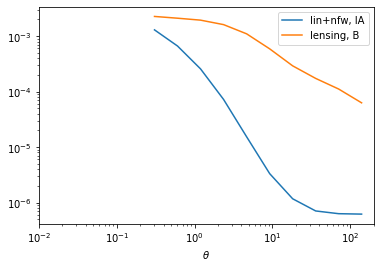

In [8]:
plt.figure()
#plt.loglog(theta,gamma_avg_lin, label='lin, IA')
#plt.loglog(theta,gamma_avg_nfw, label='nfw, IA')
plt.loglog(theta_lens,lin_plus_nfw_short*(B_b+F_b), label='lin+nfw, IA')
#plt.loglog(theta, gamma_avg_nla, label='nla, IA')
plt.loglog(theta_lens, gamma_t_B, label='lensing, B')
plt.xlabel('$\\theta$')
plt.xlim(0.01,200)
plt.legend()
plt.show()

In [9]:
stack_save = np.column_stack((theta_lens, -1.0*lin_plus_nfw_short)) # fix sign convention to agree with us here.
np.savetxt('./txtfiles/photo_z_test/mod_IA_nfw_plus_lin.txt',stack_save)

In [10]:
theta_test, test_gammaIA = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_DESY1_wfidIA_measured-redshifts-wrong_variableF_DESHoD_sigz=1e-06_delz=0.0_Aia=0.5.txt', unpack=True)

In [ ]:
print(lin_plus_nfw_short)

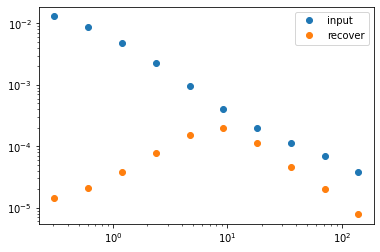

In [11]:
plt.figure()
plt.loglog(theta_lens, lin_plus_nfw_short*0.5, 'o', label='input')
plt.loglog(theta_test, test_gammaIA, 'o',label='recover')
plt.legend()
plt.show()